In [88]:
import json
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
fr=open("data/bitly_usagov/example.txt")
fr.readline()
records=[json.loads(line) for line in open("data/bitly_usagov/example.txt", encoding='utf8')]
records[0]['tz']
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

# json과 딕셔너리

In [3]:
time_zones

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'America/New_York',
 'America/Denver',
 'Europe/Rome',
 'Africa/Ceuta',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Europe/Madrid',
 'Asia/Kuala_Lumpur',
 'Asia/Nicosia',
 'America/Sao_Paulo',
 '',
 '',
 'Europe/London',
 'America/New_York',
 'Pacific/Honolulu',
 'America/Chicago',
 '',
 '',
 'Pacific/Honolulu',
 '',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'America/Chicago',
 'Europe/Rome',
 'America/New_York',
 'America/New_York',
 'America/Los_Angeles',
 '',
 '',
 'America/New_York',
 'America/New_York',
 'Europe/Malta',
 'America/New_York',
 'America/New_York',
 '',
 'America/Los_Angeles',
 'America/Sao_Paulo',
 '',
 'Asia/Hong_Kong',
 'Asia/Hong_Kong',
 'Paci

각 시간대에 해당하는 데이터가 몇개인지 알고싶다

In [6]:
def get_counts(seq):
    counts={}
    for s in seq:
        if s in counts:
            counts[s] += 1
        else:
            counts[s] = 1    # {"America/New_York": 1}
    return counts
    
counts = get_counts(time_zones)
print(counts)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

상위 10개 도시 출력

In [10]:
counts.items()    # 딕셔너리를 구성하는 요소들이 (key, value) 의 쌍으로 묶여서 튜플 형태로 만들어진다.
counts.keys()    # 딕셔너리에서 key들만 나온다
counts.values()    # 딕셔너리에서 value들만 나온다

dict_values([1251, 191, 33, 16, 521, 382, 10, 27, 2, 35, 3, 1, 74, 36, 400, 2, 8, 14, 5, 1, 3, 4, 12, 22, 10, 14, 5, 6, 28, 25, 5, 37, 6, 20, 3, 3, 3, 20, 9, 9, 1, 4, 6, 6, 4, 6, 3, 2, 3, 9, 1, 10, 1, 1, 15, 10, 4, 4, 10, 1, 6, 4, 2, 1, 4, 10, 1, 1, 1, 1, 1, 1, 5, 1, 1, 2, 1, 1, 1, 2, 2, 3, 1, 2, 3, 2, 1, 1, 11, 1, 1, 1, 1, 1, 1, 3, 1])

In [13]:
vk = [(count, tz) for tz, count in counts.items()]
vk

[(1251, 'America/New_York'),
 (191, 'America/Denver'),
 (33, 'America/Sao_Paulo'),
 (16, 'Europe/Warsaw'),
 (521, ''),
 (382, 'America/Los_Angeles'),
 (10, 'Asia/Hong_Kong'),
 (27, 'Europe/Rome'),
 (2, 'Africa/Ceuta'),
 (35, 'Europe/Madrid'),
 (3, 'Asia/Kuala_Lumpur'),
 (1, 'Asia/Nicosia'),
 (74, 'Europe/London'),
 (36, 'Pacific/Honolulu'),
 (400, 'America/Chicago'),
 (2, 'Europe/Malta'),
 (8, 'Europe/Lisbon'),
 (14, 'Europe/Paris'),
 (5, 'Europe/Copenhagen'),
 (1, 'America/Mazatlan'),
 (3, 'Europe/Dublin'),
 (4, 'Europe/Brussels'),
 (12, 'America/Vancouver'),
 (22, 'Europe/Amsterdam'),
 (10, 'Europe/Prague'),
 (14, 'Europe/Stockholm'),
 (5, 'America/Anchorage'),
 (6, 'Asia/Bangkok'),
 (28, 'Europe/Berlin'),
 (25, 'America/Rainy_River'),
 (5, 'Europe/Budapest'),
 (37, 'Asia/Tokyo'),
 (6, 'Europe/Vienna'),
 (20, 'America/Phoenix'),
 (3, 'Asia/Jerusalem'),
 (3, 'Asia/Karachi'),
 (3, 'America/Bogota'),
 (20, 'America/Indianapolis'),
 (9, 'America/Montreal'),
 (9, 'Asia/Calcutta'),
 (1, 'E

In [16]:
vk.sort()    # 정렬할 때 튜플의 첫번째 요소를 기준으로 정렬한다
vk

[(1, 'Africa/Casablanca'),
 (1, 'Africa/Johannesburg'),
 (1, 'Africa/Lusaka'),
 (1, 'America/Argentina/Buenos_Aires'),
 (1, 'America/Argentina/Cordoba'),
 (1, 'America/Argentina/Mendoza'),
 (1, 'America/Caracas'),
 (1, 'America/Costa_Rica'),
 (1, 'America/La_Paz'),
 (1, 'America/Lima'),
 (1, 'America/Mazatlan'),
 (1, 'America/Monterrey'),
 (1, 'America/Montevideo'),
 (1, 'America/Santo_Domingo'),
 (1, 'America/St_Kitts'),
 (1, 'America/Tegucigalpa'),
 (1, 'Asia/Kuching'),
 (1, 'Asia/Manila'),
 (1, 'Asia/Nicosia'),
 (1, 'Asia/Novosibirsk'),
 (1, 'Asia/Pontianak'),
 (1, 'Asia/Riyadh'),
 (1, 'Asia/Yekaterinburg'),
 (1, 'Australia/Queensland'),
 (1, 'Europe/Ljubljana'),
 (1, 'Europe/Skopje'),
 (1, 'Europe/Sofia'),
 (1, 'Europe/Uzhgorod'),
 (1, 'Europe/Volgograd'),
 (2, 'Africa/Ceuta'),
 (2, 'America/Chihuahua'),
 (2, 'America/Guayaquil'),
 (2, 'America/Recife'),
 (2, 'Asia/Amman'),
 (2, 'Europe/Belgrade'),
 (2, 'Europe/Malta'),
 (2, 'Europe/Riga'),
 (2, 'Europe/Vilnius'),
 (3, 'Africa/Cair

In [17]:
vk[-10:]

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

## Counter 클래스

클래스 이용

In [19]:
from collections import Counter
# Counter(개수를 셀 대상을 넣어준다)
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [20]:
records

[{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
  'c': 'US',
  'nk': 1,
  'tz': 'America/New_York',
  'gr': 'MA',
  'g': 'A6qOVH',
  'h': 'wfLQtf',
  'l': 'orofrog',
  'al': 'en-US,en;q=0.8',
  'hh': '1.usa.gov',
  'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
  'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
  't': 1331923247,
  'hc': 1331822918,
  'cy': 'Danvers',
  'll': [42.576698, -70.954903]},
 {'a': 'GoogleMaps/RochesterNY',
  'c': 'US',
  'nk': 0,
  'tz': 'America/Denver',
  'gr': 'UT',
  'g': 'mwszkS',
  'h': 'mwszkS',
  'l': 'bitly',
  'hh': 'j.mp',
  'r': 'http://www.AwareMap.com/',
  'u': 'http://www.monroecounty.gov/etc/911/rss.php',
  't': 1331923249,
  'hc': 1308262393,
  'cy': 'Provo',
  'll': [40.218102, -111.613297]},
 {'a': 'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0

In [21]:
frame = pd.DataFrame(records)    # 딕셔너리의 key들이 열이름으로 온다
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [22]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [25]:
frame["tz"].value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Oslo                         10
Europe/Helsinki                     10
Europe/Prague                       10
Asia/Hong_Kong           

In [23]:
frame["tz"]

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

"" (아무것도 없음)과 NaN은 같지 않다!
* "": 바구니에 과일이 없다 (바구니는 있음)
* NaN: 바구니 조차도 없다

In [26]:
frame[frame["tz"]==""]

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html
28,NaN,Mozilla/5.0 (iPad; CPU OS 5_0_1 like Mac OS X)...,en-us,None,NaN,vNJS4H,NaN,u0uD9q,1.319564e+09,1.usa.gov,NaN,o_4us71ccioa,NaN,0.0,direct,1.331923e+09,,https://www.nysdot.gov/rexdesign/design/commun...
29,NaN,Mozilla/5.0 (iPad; U; CPU OS 3_2 like Mac OS X...,en-us,None,NaN,FPX0IM,NaN,FPX0IL,1.331923e+09,1.usa.gov,NaN,twittershare,NaN,1.0,http://t.co/5xlp0B34,1.331923e+09,,http://www.ed.gov/news/media-advisories/us-dep...
34,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"en-US,en;q=0.8",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,1.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
35,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",None,NaN,xOsMcy,NaN,yV8hww,1.331829e+09,1.usa.gov,NaN,wwpinc,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.army.mil/article/75464/Marksmanship...
37,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...,"en-us,en;q=0.5",None,NaN,vNJS4H,NaN,u0uD9q,1.319564e+09,1.usa.gov,NaN,o_4us71ccioa,NaN,1.0,direct,1.331923e+09,,https://www.nysdot.gov/rexdesign/design/commun...
46,NaN,BlackBerry8520/5.0.0.592 Profile/MIDP-2.1 Conf...,en,None,NaN,yD1K8w,NaN,AAEmdT,1.331756e+09,1.usa.gov,NaN,healthit,NaN,0.0,http://mobile.twitter.com/AIDSgov,1.331923e+09,,http://www.hhs.gov/live/?utm_source=ketchum&ut...
47,NaN,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,"en-us,en;q=0.5",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/home.php?,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...


In [27]:
len(frame[frame["tz"]==""])    # "" 개수 출력

521

In [32]:
len(frame[frame["tz"].isnull()])    # NaN 개수 출력

120

In [34]:
frame["tz"].value_counts()    # value_counts 에 NaN은 제외된다

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Oslo                         10
Europe/Helsinki                     10
Europe/Prague                       10
Asia/Hong_Kong           

In [37]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz.value_counts()

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Prague                       10
Europe/Helsinki                     10
Asia/Hong_Kong           

In [38]:
clean_tz[clean_tz==""] = "Unknown"
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                   Unknown
8                   Unknown
9                   Unknown
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                  Missing
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                  Unknown
29                  Unknown
               ...         
3530    America/Los_Angeles
3531                Unknown
3532       America/New_York
3533       America/New_York
3534        America/

In [39]:
clean_tz.value_counts()

America/New_York                  1251
Unknown                            521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
America/Puerto_Rico                 10
Europe/Oslo                         10
Europe/Prague            

In [40]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

## 시각화

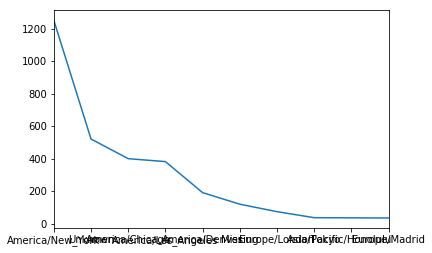

In [42]:
tz_counts[:10].plot()

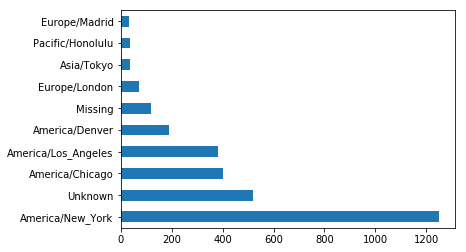

In [43]:
# 이런 경우 가로막대 그래프가 더 보기 좋다
tz_counts[:10].plot(kind="barh")

# 응용 분석

In [44]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [46]:
frame["a"]
frame.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [47]:
frame.a.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13       True
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3530    False
3531    False
3532    False
3533    False
3534    False
3535    False
3536    False
3537    False
3538    False
3539    False
3540    False
3541    False
3542    False
3543     True
3544    False
3545    False
3546    False
3547    False
3548    False
3549    False
3550    False
3551    False
3552    False
3553    False
3554    False
3555    False
3556    False
3557    False
3558    False
3559    False
Name: a, Length: 3560, dtype: bool

In [48]:
frame.a.isnull().sum()    # True는 1, False는 0

120

In [49]:
len(frame[frame.a.isnull()])

120

In [52]:
len(frame)    # 3560
frame.info()    # a컬럼의 데이터는 3440개 (NaN이 120개)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [53]:
len(frame.a.dropna())

3440

In [54]:
for x in frame.a.dropna():
    print(x)

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11
GoogleMaps/RochesterNY
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, like Gecko) Version/5.1.2 Safari/534.52.7
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/20100101 Firefox/4.0.1
Opera/9.80 (X11; Linux zbov; U; en) Presto/2.10.254 Version/12.00
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
M

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_7_3) AppleWebKit/534.53.11 (KHTML, like Gecko) Version/5.1.3 Safari/534.53.10
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 1.1.4322; .NET4.0C; InfoPath.2)
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 1.1.4322; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)
Mozilla/5.0 (Windows NT 6.0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:9.0.1) Gecko/20100101 Firefox/9.0.1
Mozilla/5.0 (compatible; MSIE 9.

In [55]:
[x.split() for x in frame.a.dropna()]    # split은 default가 공백으로 나누는 것

[['Mozilla/5.0',
  '(Windows',
  'NT',
  '6.1;',
  'WOW64)',
  'AppleWebKit/535.11',
  '(KHTML,',
  'like',
  'Gecko)',
  'Chrome/17.0.963.78',
  'Safari/535.11'],
 ['GoogleMaps/RochesterNY'],
 ['Mozilla/4.0',
  '(compatible;',
  'MSIE',
  '8.0;',
  'Windows',
  'NT',
  '6.1;',
  'WOW64;',
  'Trident/4.0;',
  'SLCC2;',
  '.NET',
  'CLR',
  '2.0.50727;',
  '.NET',
  'CLR',
  '3.5.30729;',
  '.NET',
  'CLR',
  '3.0.30729;',
  'Media',
  'Center',
  'PC',
  '6.0;',
  '.NET4.0C;',
  '.NET4.0E;',
  'InfoPath.3)'],
 ['Mozilla/5.0',
  '(Macintosh;',
  'Intel',
  'Mac',
  'OS',
  'X',
  '10_6_8)',
  'AppleWebKit/534.52.7',
  '(KHTML,',
  'like',
  'Gecko)',
  'Version/5.1.2',
  'Safari/534.52.7'],
 ['Mozilla/5.0',
  '(Windows',
  'NT',
  '6.1;',
  'WOW64)',
  'AppleWebKit/535.11',
  '(KHTML,',
  'like',
  'Gecko)',
  'Chrome/17.0.963.79',
  'Safari/535.11'],
 ['Mozilla/5.0',
  '(Windows',
  'NT',
  '6.1;',
  'WOW64)',
  'AppleWebKit/535.11',
  '(KHTML,',
  'like',
  'Gecko)',
  'Chrome/17.0.96

In [84]:
[x.split()[0] for x in frame.a.dropna()]

['Mozilla/5.0',
 'GoogleMaps/RochesterNY',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Opera/9.80',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'GoogleMaps/RochesterNY',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'BlackBerry8520/5.0.0.592',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/5.0',
 'Mozilla/4.0',
 'Mozilla/4.0',
 'Mozi

In [57]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])
results

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [58]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
BlackBerry9630/5.0.0.975                                2
Socialite/7766                                          2
Acoon                                                   2
BlackBerry9700/5.0.0.862                                1
Mozilla/0.6                                             1
SAMSUNG-SGH-A887/A887UCIJ1                              1
Opera/9.30    

In [59]:
results.value_counts()[:5]    # 상위 5개

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [60]:
frame.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
13                                                    NaN
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozill

In [63]:
cframe = frame[frame.a.notnull()]    # a열에 값이 있는 것들만 추출
cframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [64]:
cframe.a

0       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                                  GoogleMaps/RochesterNY
2       Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3       Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6       Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7       Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8       Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9       Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
11      Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10.4...
12      Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
14      Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...
15      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
16      Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.1...
17      Mozilla/5.0 (Macintosh; Intel Mac OS X 10.5; r...
18            

a열의 데이터에 windows라는 문자열이 있으면 True, 없으면 False가 나오면 좋겠다

In [87]:
"hi hello".contains("hi")    # 왜 에러가 나지?

AttributeError: 'str' object has no attribute 'contains'

In [72]:
cframe.a.str.contains("Windows")

0        True
1       False
2        True
3       False
4        True
5        True
6        True
7        True
8       False
9        True
10       True
11      False
12       True
14       True
15       True
16       True
17      False
18      False
19       True
20       True
21      False
22       True
23      False
24       True
25       True
26       True
27      False
28      False
29      False
30       True
        ...  
3529     True
3530     True
3531    False
3532     True
3533    False
3534    False
3535     True
3536    False
3537     True
3538    False
3539    False
3540     True
3541    False
3542     True
3544     True
3545     True
3546    False
3547    False
3548    False
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557    False
3558    False
3559     True
Name: a, Length: 3440, dtype: bool

In [73]:
type(cframe.a.str)

pandas.core.strings.StringMethods

In [77]:
os = np.where(cframe.a.str.contains("Windows"), "Windows", "Not Windows")
os

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], dtype='<U11')

In [79]:
cframe

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [81]:
by_tz_os = cframe.groupby(["tz", os])      # 현재 cframe 따로, os 따로지만 행 인덱스 번호가 같으므로 이렇게 할 수 있다
by_tz_os

In [82]:
by_tz_os.size()

tz                                         
                                Not Windows    245
                                Windows        276
Africa/Cairo                    Windows          3
Africa/Casablanca               Windows          1
Africa/Ceuta                    Windows          2
Africa/Johannesburg             Windows          1
Africa/Lusaka                   Windows          1
America/Anchorage               Not Windows      4
                                Windows          1
America/Argentina/Buenos_Aires  Not Windows      1
America/Argentina/Cordoba       Windows          1
America/Argentina/Mendoza       Windows          1
America/Bogota                  Not Windows      1
                                Windows          2
America/Caracas                 Windows          1
America/Chicago                 Not Windows    115
                                Windows        285
America/Chihuahua               Not Windows      1
                                Window

# 데이터 필터링

## 필터 함수

In [90]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [91]:
tips["size"]    # 인원 수

0      2
1      3
2      3
3      2
4      4
5      4
6      2
7      4
8      2
9      2
10     2
11     4
12     2
13     4
14     2
15     2
16     3
17     3
18     3
19     3
20     2
21     2
22     2
23     4
24     2
25     4
26     2
27     2
28     2
29     2
      ..
214    3
215    2
216    5
217    2
218    2
219    4
220    2
221    2
222    1
223    3
224    2
225    2
226    2
227    4
228    2
229    2
230    4
231    3
232    2
233    2
234    2
235    2
236    2
237    2
238    3
239    3
240    2
241    2
242    2
243    2
Name: size, Length: 244, dtype: int64

In [92]:
tips["size"].value_counts()    # 각 인원당 몇팀씩 왔는지 확인

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [95]:
# 30팀 이상인 인원만 추출하고 싶다
tips_filtered = tips.groupby("size").filter(lambda x: x["size"].count()>=30)    # 그룹 각각에 대해서 필터함수 적용    
# 일반적으로 필터함수 안에는 람다함수를 많이 쓴다.
tips_filtered

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [96]:
tips_filtered.shape

(231, 7)

In [97]:
tips_filtered["size"].value_counts()   # 인원 수가 5, 6, 1명인 경우는 안나온다 -- 필터아웃 되었기 때문에

2    156
3     38
4     37
Name: size, dtype: int64

# 시계열 데이터

In [98]:
from datetime import datetime

자주 사용되는 오브젝트들
* date: 날짜
* time: 시간
* datetime: 날짜+시간

In [99]:
datetime.now()

datetime.datetime(2019, 7, 12, 13, 39, 13, 482296)

In [100]:
t1 = datetime.now()
print(t1)

2019-07-12 13:40:00.679409


In [102]:
t2 = datetime.today()
print(t2)

2019-07-12 13:41:20.529063


In [104]:
print(datetime(2019, 7, 12))

2019-07-12 00:00:00


In [105]:
datetime.now() - datetime(2019, 8, 15)    # 객체들끼리 연산이 가능하다

datetime.timedelta(days=-34, seconds=49445, microseconds=224625)

In [106]:
type(datetime.now() - datetime(2019, 8, 15))

datetime.timedelta

In [107]:
datetime.now() - datetime(1991, 10, 18)

datetime.timedelta(days=10129, seconds=49514, microseconds=558931)

## 날짜 데이터 분석 예시

In [108]:
ebola = pd.read_csv("data/country_timeseries.csv")
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
5,12/28/2014,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
6,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
7,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
8,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
9,12/20/2014,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,1586.0,3384.0,2556.0,NaN,NaN,NaN,NaN,NaN


In [109]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


to_datetime 함수를 통해 시계열 데이터로 바꿀 수 있다

In [111]:
pd.to_datetime(ebola["Date"])

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
5     2014-12-28
6     2014-12-27
7     2014-12-24
8     2014-12-21
9     2014-12-20
10    2014-12-18
11    2014-12-14
12    2014-12-09
13    2014-12-07
14    2014-12-03
15    2014-11-30
16    2014-11-28
17    2014-11-23
18    2014-11-22
19    2014-11-18
20    2014-11-16
21    2014-11-15
22    2014-11-11
23    2014-11-10
24    2014-11-09
25    2014-11-08
26    2014-11-04
27    2014-11-03
28    2014-11-02
29    2014-10-31
         ...    
92    2014-05-23
93    2014-05-12
94    2014-05-10
95    2014-05-07
96    2014-05-05
97    2014-05-03
98    2014-05-01
99    2014-04-26
100   2014-04-24
101   2014-04-23
102   2014-04-22
103   2014-04-21
104   2014-04-20
105   2014-04-17
106   2014-04-16
107   2014-04-15
108   2014-04-14
109   2014-04-11
110   2014-04-09
111   2014-04-07
112   2014-04-04
113   2014-04-01
114   2014-03-31
115   2014-03-29
116   2014-03-28
117   2014-03-27
118   2014-03-26
119   2014-03-

In [115]:
ebola["date_dt"] = pd.to_datetime(ebola["Date"])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

## to_datetime의 옵션들

In [116]:
test_df1 = pd.DataFrame({
    "order_day": ["07/12/19", "08/12/19", "09/12/19"]
})
test_df1

,order_day
0,07/12/19
1,08/12/19
2,09/12/19


In [118]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
order_day    3 non-null object
dtypes: object(1)
memory usage: 104.0+ bytes


In [119]:
pd.to_datetime(test_df1["order_day"])    # default 변환 형식

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

In [122]:
pd.to_datetime(test_df1["order_day"], format="%m/%d/%y")     # test_df1에 적은 형식과 같음

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]


In [123]:
pd.to_datetime(test_df1["order_day"], format="%d/%m/%y")    # 이렇게 하면 컴퓨터가 월을 일로, 일을 월로 생각하게 됨

0   2019-12-07
1   2019-12-08
2   2019-12-09
Name: order_day, dtype: datetime64[ns]

In [124]:
pd.to_datetime(test_df1["order_day"], format="%y/%m/%d")

0   2007-12-19
1   2008-12-19
2   2009-12-19
Name: order_day, dtype: datetime64[ns]

In [125]:
test_df2 = pd.DataFrame({
    "order_day": ["07-12-19", "08-12-19", "09-12-19"]
})
test_df2

,order_day
0,07-12-19
1,08-12-19
2,09-12-19


In [127]:
pd.to_datetime(test_df2["order_day"], format="%m-%d-%y")

0   2019-07-12
1   2019-08-12
2   2019-09-12
Name: order_day, dtype: datetime64[ns]

## 시계열 데이터를 구분해서 추출

In [128]:
now = datetime.now()
now

datetime.datetime(2019, 7, 12, 14, 23, 30, 682933)

In [130]:
now.strftime("%y-%m-%d")

'19-07-12'

In [131]:
now.strftime("%Y-%m-%d")

'2019-07-12'

In [132]:
now.strftime("%H:%M:%S")

'14:23:30'

datetime object로 변환하고자 하는 열을 지정: parse_dates

In [134]:
ebola1 = pd.read_csv("data/country_timeseries.csv", parse_dates=["Date"])
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [138]:
ebola1["Date"][0]

Timestamp('2015-01-05 00:00:00')

In [139]:
ebola1["Date"][0].year

2015

In [140]:
ebola1["Date"][0].month

1

In [141]:
ebola1["Date"][0].day

5

# dt 접근자

In [142]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [143]:
ebola1["date_dt"] = ebola1["Date"]    # 예비로 열 복사

In [144]:
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(16), int64(1)
memory usage: 

In [150]:
ebola1["date_dt"].year    # series 속성에는 year가 없다
# 그런데 column 전체에 대해서 year를 뽑아내고 싶다

AttributeError: 'Series' object has no attribute 'year'

In [151]:
# column 전체에 대해서 year를 뽑아내고 싶다
ebola1["date_dt"].dt.year

0      2015
1      2015
2      2015
3      2015
4      2014
5      2014
6      2014
7      2014
8      2014
9      2014
10     2014
11     2014
12     2014
13     2014
14     2014
15     2014
16     2014
17     2014
18     2014
19     2014
20     2014
21     2014
22     2014
23     2014
24     2014
25     2014
26     2014
27     2014
28     2014
29     2014
       ... 
92     2014
93     2014
94     2014
95     2014
96     2014
97     2014
98     2014
99     2014
100    2014
101    2014
102    2014
103    2014
104    2014
105    2014
106    2014
107    2014
108    2014
109    2014
110    2014
111    2014
112    2014
113    2014
114    2014
115    2014
116    2014
117    2014
118    2014
119    2014
120    2014
121    2014
Name: date_dt, Length: 122, dtype: int64

In [152]:
ebola1["year"] = ebola1["date_dt"].dt.year
ebola1[["Date", "date_dt", "year"]].head()

,Date,date_dt,year
0,2015-01-05,2015-01-05,2015
1,2015-01-04,2015-01-04,2015
2,2015-01-03,2015-01-03,2015
3,2015-01-02,2015-01-02,2015
4,2014-12-31,2014-12-31,2014


In [153]:
ebola1["date_dt"].dt.month

0       1
1       1
2       1
3       1
4      12
5      12
6      12
7      12
8      12
9      12
10     12
11     12
12     12
13     12
14     12
15     11
16     11
17     11
18     11
19     11
20     11
21     11
22     11
23     11
24     11
25     11
26     11
27     11
28     11
29     10
       ..
92      5
93      5
94      5
95      5
96      5
97      5
98      5
99      4
100     4
101     4
102     4
103     4
104     4
105     4
106     4
107     4
108     4
109     4
110     4
111     4
112     4
113     4
114     3
115     3
116     3
117     3
118     3
119     3
120     3
121     3
Name: date_dt, Length: 122, dtype: int64

In [154]:
ebola1["date_dt"].dt.day

0       5
1       4
2       3
3       2
4      31
5      28
6      27
7      24
8      21
9      20
10     18
11     14
12      9
13      7
14      3
15     30
16     28
17     23
18     22
19     18
20     16
21     15
22     11
23     10
24      9
25      8
26      4
27      3
28      2
29     31
       ..
92     23
93     12
94     10
95      7
96      5
97      3
98      1
99     26
100    24
101    23
102    22
103    21
104    20
105    17
106    16
107    15
108    14
109    11
110     9
111     7
112     4
113     1
114    31
115    29
116    28
117    27
118    26
119    25
120    24
121    22
Name: date_dt, Length: 122, dtype: int64

In [155]:
ebola1["month"], ebola1["day"] = ebola1["date_dt"].dt.month, ebola1["date_dt"].dt.day
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                

In [156]:
ebola1.iloc[:,:]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,2977.0,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,2943.0,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,2915.0,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,2827.0,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31
5,2014-12-28,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,...,2758.0,NaN,NaN,NaN,NaN,NaN,2014-12-28,2014,12,28
6,2014-12-27,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,...,2732.0,NaN,NaN,NaN,NaN,NaN,2014-12-27,2014,12,27
7,2014-12-24,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,...,2655.0,NaN,NaN,NaN,NaN,NaN,2014-12-24,2014,12,24
8,2014-12-21,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,...,2582.0,NaN,NaN,NaN,NaN,NaN,2014-12-21,2014,12,21
9,2014-12-20,272,2571.0,7862.0,8939.0,NaN,NaN,NaN,NaN,NaN,...,2556.0,NaN,NaN,NaN,NaN,NaN,2014-12-20,2014,12,20


In [158]:
ebola1.iloc[-5:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


ebola 최초 발병일이 궁금하다

In [159]:
ebola1["date_dt"]

0     2015-01-05
1     2015-01-04
2     2015-01-03
3     2015-01-02
4     2014-12-31
5     2014-12-28
6     2014-12-27
7     2014-12-24
8     2014-12-21
9     2014-12-20
10    2014-12-18
11    2014-12-14
12    2014-12-09
13    2014-12-07
14    2014-12-03
15    2014-11-30
16    2014-11-28
17    2014-11-23
18    2014-11-22
19    2014-11-18
20    2014-11-16
21    2014-11-15
22    2014-11-11
23    2014-11-10
24    2014-11-09
25    2014-11-08
26    2014-11-04
27    2014-11-03
28    2014-11-02
29    2014-10-31
         ...    
92    2014-05-23
93    2014-05-12
94    2014-05-10
95    2014-05-07
96    2014-05-05
97    2014-05-03
98    2014-05-01
99    2014-04-26
100   2014-04-24
101   2014-04-23
102   2014-04-22
103   2014-04-21
104   2014-04-20
105   2014-04-17
106   2014-04-16
107   2014-04-15
108   2014-04-14
109   2014-04-11
110   2014-04-09
111   2014-04-07
112   2014-04-04
113   2014-04-01
114   2014-03-31
115   2014-03-29
116   2014-03-28
117   2014-03-27
118   2014-03-26
119   2014-03-

In [160]:
ebola1["date_dt"].min()

Timestamp('2014-03-22 00:00:00')

In [162]:
ebola1["outbreak_d"] = ebola1["date_dt"] - ebola1["date_dt"].min()    # 경과일
ebola1.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,date_dt,year,month,day,outbreak_d
0,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-05,2015,1,5,289 days
1,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-04,2015,1,4,288 days
2,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-03,2015,1,3,287 days
3,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015-01-02,2015,1,2,286 days
4,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2014-12-31,2014,12,31,284 days


In [165]:
banks = pd.read_csv("data/banklist.csv")    # 문 닫은 은행 내역
banks_no_dates = pd.read_csv("data/banklist.csv")
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [164]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null object
Updated Date             555 non-null object
dtypes: int64(1), object(6)
memory usage: 30.4+ KB


In [166]:
banks = pd.read_csv("data/banklist.csv", parse_dates=[5, 6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
Bank Name                555 non-null object
City                     555 non-null object
ST                       555 non-null object
CERT                     555 non-null int64
Acquiring Institution    555 non-null object
Closing Date             555 non-null datetime64[ns]
Updated Date             555 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB


# quarter 속성

각 은행들이 몇 사분기에 망했는지 알고싶다

In [167]:
banks["Closing Date"].dt.year

0      2017
1      2017
2      2017
3      2017
4      2017
5      2017
6      2017
7      2017
8      2016
9      2016
10     2016
11     2016
12     2016
13     2015
14     2015
15     2015
16     2015
17     2015
18     2015
19     2015
20     2015
21     2014
22     2014
23     2014
24     2014
25     2014
26     2014
27     2014
28     2014
29     2014
       ... 
525    2008
526    2008
527    2008
528    2007
529    2007
530    2007
531    2004
532    2004
533    2004
534    2004
535    2003
536    2003
537    2003
538    2002
539    2002
540    2002
541    2002
542    2002
543    2002
544    2002
545    2002
546    2002
547    2002
548    2002
549    2001
550    2001
551    2001
552    2001
553    2000
554    2000
Name: Closing Date, Length: 555, dtype: int64

In [168]:
banks["Closing Date"].dt.quarter    # 해당 날짜가 몇사분기인지 나온다
# 1~3월: 1사분기, 4~6월: 2사분기, 7~9월: 3사분기, 10~12월: 4사분기

0      4
1      4
2      2
3      2
4      2
5      1
6      1
7      1
8      3
9      3
10     2
11     2
12     1
13     4
14     4
15     3
16     2
17     1
18     1
19     1
20     1
21     4
22     4
23     4
24     4
25     3
26     3
27     2
28     2
29     2
      ..
525    2
526    1
527    1
528    4
529    3
530    1
531    2
532    1
533    1
534    1
535    4
536    2
537    1
538    4
539    4
540    3
541    2
542    2
543    1
544    1
545    1
546    1
547    1
548    1
549    3
550    3
551    2
552    1
553    4
554    4
Name: Closing Date, Length: 555, dtype: int64

In [169]:
banks["closing_quarter"], banks["closing_year"] = banks["Closing Date"].dt.quarter, banks["Closing Date"].dt.year

년도별로 문을 닫은 은행의 개수가 궁금하다

In [171]:
closing_year = banks.groupby("closing_year").size()
closing_year

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64

1차 그룹화 기준을 year로, 2차 그룹화 기준을 쿼터로 하고 싶다

In [172]:
closing_year_q = banks.groupby(["closing_year", "closing_quarter"]).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

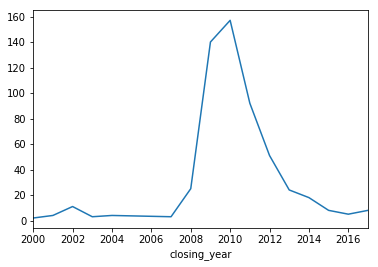

In [173]:
closing_year.plot()

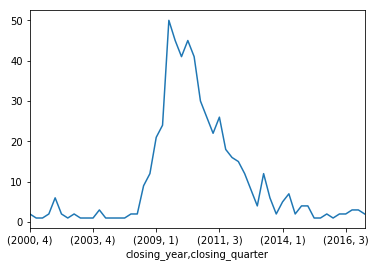

In [174]:
closing_year_q.plot()

# 수치값을 범위로 나누어서 카테고리화 시키고 싶다: cut, qcut 함수

## cut 함수

In [177]:
ages = [0, 2, 15, 21, 23, 37, 31, 61, 20, 41, 32, 100]
# 나이를 1~15, 16~25, ..., 60~99 로 나누고 싶다
bins = [1, 15, 25, 35, 60, 99]
labels = ["꼬맹이", "소년", "청년", "중년", "노년"]
data = pd.cut(ages, bins, labels=labels)    # 카테고리화 (결과 자료형도 category형으로 나온다)
data

[NaN, 꼬맹이, 꼬맹이, 소년, 소년, ..., 노년, 소년, 중년, 청년, NaN]
Length: 12
Categories (5, object): [꼬맹이 < 소년 < 청년 < 중년 < 노년]

In [178]:
type(data)

pandas.core.arrays.categorical.Categorical

In [179]:
data.codes    # 각 데이터가 어느 영역에 속하는지 보여준다 (-1은 NaN)

array([-1,  0,  0,  1,  1,  3,  2,  4,  1,  3,  2, -1], dtype=int8)

In [182]:
df = pd.DataFrame(ages, columns=["ages"])
df["age_data"] = pd.cut(df.ages, bins, labels=labels)
df

,ages,age_data
0,0,NaN
1,2,꼬맹이
2,15,꼬맹이
3,21,소년
4,23,소년
5,37,중년
6,31,청년
7,61,노년
8,20,소년
9,41,중년


## qcut 함수

In [184]:
data = np.random.randn(100)
data

array([-1.12625833,  0.98106257,  0.35507209,  1.64485093,  1.30466651,
        0.1196156 ,  0.18324453, -1.12540902,  1.34706975,  0.55124884,
        1.63883425, -0.70764547,  0.78934437,  2.33535019,  0.96360651,
       -1.19233608,  0.55666078,  1.21468439, -0.40222051,  0.22052773,
        1.35161685,  1.3015951 , -0.43982087, -0.43429647,  0.10904309,
       -1.32763367,  1.23451717, -0.01138581,  0.38891973,  0.38561537,
        0.47915882, -0.11786338, -0.05154791, -0.25237888, -0.04410953,
       -0.62375348, -1.76796664, -1.68201008, -0.99451271,  1.79489792,
       -0.41461742,  0.31217586, -0.54121412,  0.18904764, -0.38878682,
        2.24416999, -2.9865272 ,  1.61648502,  0.95005931, -1.15167691,
       -1.38794001,  0.06113332,  1.15413289, -0.79981366,  0.4453647 ,
        1.05027847,  1.06184507, -1.43947393, -0.66645422, -1.4299674 ,
       -0.02639394,  1.86052784,  0.55298857,  0.45362896, -0.12038988,
        0.31105211,  0.60041152,  0.08066599, -0.3972792 ,  0.74

In [185]:
# data를 균등하게 4개의 구간으로 나누고 싶다
pd.qcut(data, 4, labels=["A1", "A2", "A3", "A4"])

[A1, A4, A3, A4, A4, ..., A2, A4, A2, A4, A1]
Length: 100
Categories (4, object): [A1 < A2 < A3 < A4]